In [38]:
# import needed libaries

import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from keras.backend import clear_session
from keras.src.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Softmax, BatchNormalization, Input, Dropout, RandomRotation, RandomFlip
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

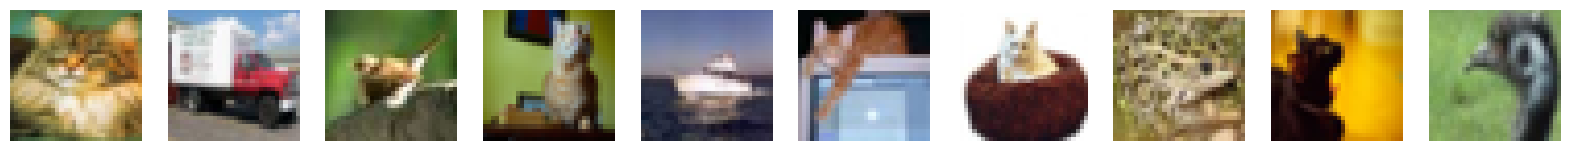

In [65]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images by scaling the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class labels (y_train, y_test) to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Plot a few random images from the training set
def plot_random_images():
    fig, axes = plt.subplots(1, 10, figsize=(20, 2))
    for i in range(10):
        random_idx = np.random.randint(0, len(x_train))
        axes[i].imshow(x_train[random_idx])
        axes[i].axis('off')
    plt.show()

# Call the function to display random images
plot_random_images()

### Add reusable methods for plotting confusion matrix / comparison of accuracy and loss

In [3]:
# The confusion matrix shows the counts of true positives, true negatives, false positives, and false negatives for each class, revealing how well the model predicts different classes.

def show_confusion_matrix(cnn_model, y_test_data, x_test_data, name):
    predictions = cnn_model.predict(x_test_data)
    predictions = np.argmax(predictions, axis=1)
    gt = np.argmax(y_test_data, axis=1)

    cm = metrics.confusion_matrix(gt, predictions)
    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.savefig(f"output/confusion_matrix_{name}.png")
    plt.show()

In [23]:
def show_compare_graph(cnn_history, name):
    plt.title('Loss / Accuracy')
    plt.plot(cnn_history.history['loss'], color='#ff8080', label='train')
    plt.plot(cnn_history.history['accuracy'], color='#80ff80', label='train')
    plt.plot(cnn_history.history['val_loss'], color='#b30000', label='val')
    plt.plot(cnn_history.history['val_accuracy'], color='#008f00', label='val')
    plt.savefig(f"output/compare_graph_{name}.png")
    plt.show()

In [15]:
# function to get the F-1 score
def show_classification_report(cnn_model, y_test_data, x_test_data):
    predictions = cnn_model.predict(x_test_data)
    predictions = np.argmax(predictions, axis=1)
    y_data_argmax = np.argmax(y_test_data, axis=1)
    print(metrics.classification_report(y_data_argmax, predictions))

### Define first model with 60 epochs and a batch size of 512

In [6]:
clear_session()

In [7]:
# Define the CNN model
model = Sequential()

# Add a convolutional layer with a 3x3 filter, 32 filters, and input shape (32, 32, 3)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Add a dense layer with 100 units
model.add(Dense(100, activation='relu'))

# Add the output classification layer with softmax activation for 10 classes
model.add(Dense(10, activation='softmax'))

# Print model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Time the model training
start_time = time.time()

# Train the model
history = model.fit(x_train, y_train, epochs=60, batch_size=512, validation_data=(x_test, y_test))

end_time = time.time()

# Calculate the time taken
training_time = end_time - start_time

print(f"Model training time: {training_time} seconds")

Epoch 1/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.1527 - loss: 2.2750 - val_accuracy: 0.2234 - val_loss: 2.1626
Epoch 2/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2399 - loss: 2.1307 - val_accuracy: 0.2887 - val_loss: 2.0570
Epoch 3/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2879 - loss: 2.0298 - val_accuracy: 0.2974 - val_loss: 1.9866
Epoch 4/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3135 - loss: 1.9598 - val_accuracy: 0.3277 - val_loss: 1.9148
Epoch 5/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3281 - loss: 1.9099 - val_accuracy: 0.3462 - val_loss: 1.8750
Epoch 6/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3479 - loss: 1.8655 - val_accuracy: 0.3521 - val_loss: 1.8503
Epoch 7/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3561 - loss: 1.8411 - val_accuracy: 0.3430 - val_loss: 1.8556
Epoch 8/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3690 - loss: 1.8156 - val_accuracy: 0.3721 - val_loss

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


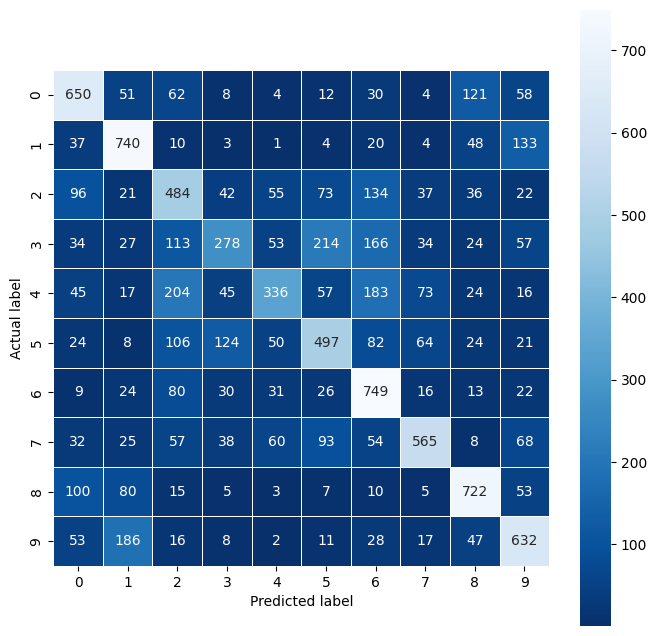

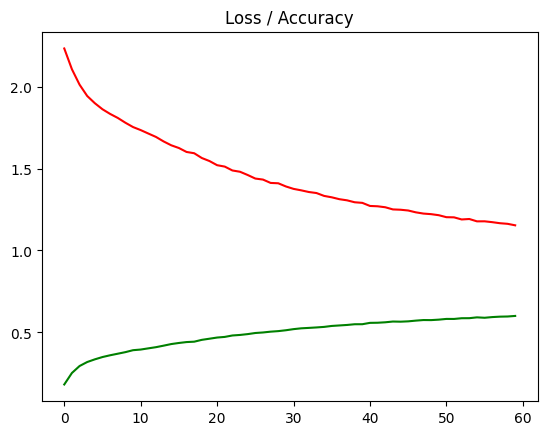

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.60      0.65      0.62      1000
           1       0.63      0.74      0.68      1000
           2       0.42      0.48      0.45      1000
           3       0.48      0.28      0.35      1000
           4       0.56      0.34      0.42      1000
           5       0.50      0.50      0.50      1000
           6       0.51      0.75      0.61      1000
           7       0.69      0.56      0.62      1000
           8       0.68      0.72      0.70      1000
           9       0.58      0.63      0.61      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.56     10000
weighted avg       0.57      0.57      0.56     10000



In [16]:
show_confusion_matrix(model, y_test, x_test, 'model_1')
show_compare_graph(history, 'model_1')
show_classification_report(model, y_test, x_test)

As we can see, the result is not very good. The loss is higher as the accuracy

In [11]:
clear_session()

In [12]:
# Define the CNN model
model2 = Sequential([
    Input(shape=(32, 32, 3)), # Set input shape (32, 32, 3)
    Conv2D(64, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 64 filters
    BatchNormalization(), # Add a max pooling layer
    Conv2D(64, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 64 filters
    BatchNormalization(), # Add a max pooling layer
    MaxPooling2D((2, 2)), # Add a max pooling layer
    Dropout(0.25), # Set a Dropout of 0.25
    Flatten(), # Flatten the feature maps
    Dense(100, activation='relu'), # Add a dense layer with 100 units
    Dense(10, activation='softmax') # Add the output classification layer with softmax activation for 10 classes
])

# Print model summary
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │       1,638,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,678,742 (6.40 MB)

 Trainable params: 1,678,486 (6.40 MB)

 Non-trainable params: 256 (1.00 KB)

In [13]:
# Compile model
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Time the model training
start_time = time.time()

# Train the model
history2 = model2.fit(x_train, y_train, epochs=30, batch_size=512, validation_data=(x_test, y_test))

end_time = time.time()

# Calculate the time taken
training_time = end_time - start_time

print(f"Model training time: {training_time} seconds")

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 118ms/step - accuracy: 0.3083 - loss: 2.0622 - val_accuracy: 0.1014 - val_loss: 2.5266
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.4708 - loss: 1.4881 - val_accuracy: 0.1052 - val_loss: 3.1198
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.5281 - loss: 1.3250 - val_accuracy: 0.1832 - val_loss: 2.8525
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.5594 - loss: 1.2293 - val_accuracy: 0.3704 - val_loss: 1.7701
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.5955 - loss: 1.1398 - val_accuracy: 0.5239 - val_loss: 1.3530
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.6155 - loss: 1.0789 - val_accuracy: 0.5896 - val_loss: 1.1599
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.6379 - loss: 1.0202 - val_accuracy: 0.6221 - val_loss: 1.0687
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.6524 - loss: 0.9782 - val_accuracy: 0.6074 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


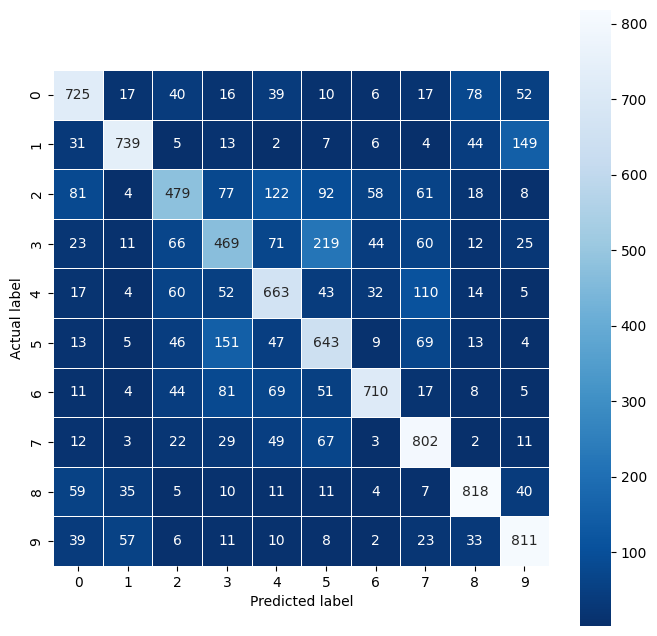

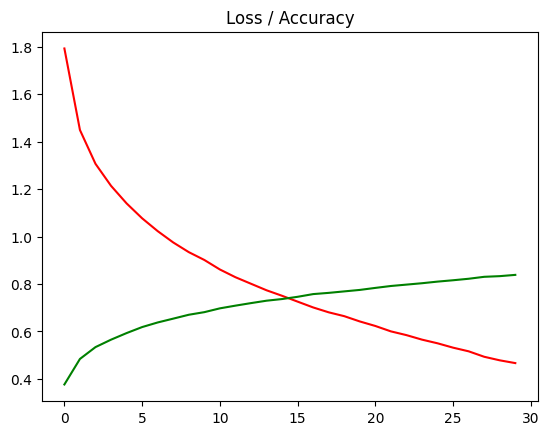

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1000
           1       0.84      0.74      0.79      1000
           2       0.62      0.48      0.54      1000
           3       0.52      0.47      0.49      1000
           4       0.61      0.66      0.64      1000
           5       0.56      0.64      0.60      1000
           6       0.81      0.71      0.76      1000
           7       0.69      0.80      0.74      1000
           8       0.79      0.82      0.80      1000
           9       0.73      0.81      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000



In [17]:
show_confusion_matrix(model2, y_test, x_test, 'model_2')
show_compare_graph(history2, 'model_2')
show_classification_report(model2, y_test, x_test)

In [ ]:
clear_session()

In [18]:
# Define the CNN model
model3 = Sequential([
    Input(shape=(32, 32, 3)), # Set input shape (32, 32, 3)
    Conv2D(64, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 64 filters
    BatchNormalization(), # Add a max pooling layer
    Conv2D(64, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 64 filters
    BatchNormalization(), # Add a max pooling layer
    MaxPooling2D((2, 2)), # Add a max pooling layer
    Conv2D(128, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 128 filters
    BatchNormalization(), # Add a max pooling layer
    Conv2D(128, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 128 filters
    BatchNormalization(), # Add a max pooling layer
    MaxPooling2D((2, 2)), # Add a max pooling layer
    Dropout(0.25), # Set a Dropout of 0.25
    Flatten(), # Flatten the feature maps
    Dense(100, activation='relu'), # Add a dense layer with 100 units
    Dense(10, activation='softmax') # Add the output classification layer with softmax activation for 10 classes
])

# Print model summary
model3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │         819,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,082,006 (4.13 MB)

 Trainable params: 1,081,238 (4.12 MB)

 Non-trainable params: 768 (3.00 KB)

In [19]:
# Compile model
model3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Time the model training
start_time = time.time()

# Train the model
history3 = model3.fit(x_train, y_train, epochs=30, batch_size=512, validation_data=(x_test, y_test))

end_time = time.time()

# Calculate the time taken
training_time = end_time - start_time

print(f"Model training time: {training_time} seconds")

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 160ms/step - accuracy: 0.3025 - loss: 2.1576 - val_accuracy: 0.1166 - val_loss: 2.5539
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.4908 - loss: 1.4122 - val_accuracy: 0.1617 - val_loss: 2.6419
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.5479 - loss: 1.2546 - val_accuracy: 0.2342 - val_loss: 2.6480
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.5886 - loss: 1.1466 - val_accuracy: 0.2652 - val_loss: 2.4652
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.6157 - loss: 1.0724 - val_accuracy: 0.4148 - val_loss: 1.6805
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.6485 - loss: 0.9892 - val_accuracy: 0.5617 - val_loss: 1.2468
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.6635 - loss: 0.9410 - val_accuracy: 0.6469 - val_loss: 0.9976
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.6845 - loss: 0.8858 - val_accuracy: 0.6645 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


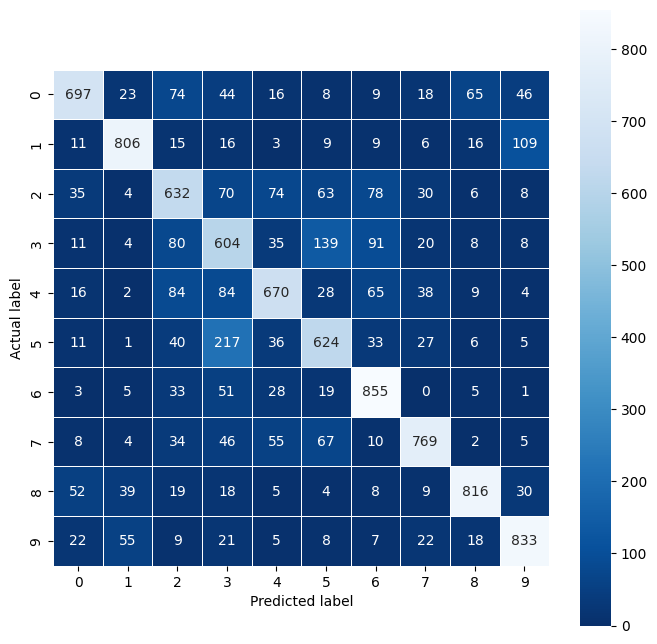

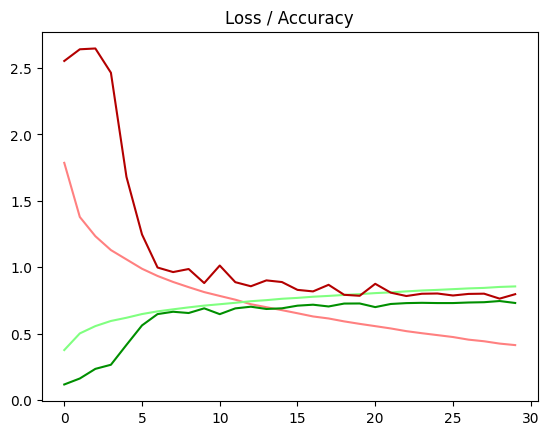

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.70      0.75      1000
           1       0.85      0.81      0.83      1000
           2       0.62      0.63      0.63      1000
           3       0.52      0.60      0.56      1000
           4       0.72      0.67      0.70      1000
           5       0.64      0.62      0.63      1000
           6       0.73      0.85      0.79      1000
           7       0.82      0.77      0.79      1000
           8       0.86      0.82      0.84      1000
           9       0.79      0.83      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



In [24]:
show_confusion_matrix(model3, y_test, x_test, 'model_3')
show_compare_graph(history3, 'model_3')
show_classification_report(model3, y_test, x_test)

In [ ]:
clear_session()

In [29]:
# Define the CNN model
model4 = Sequential([
    Input(shape=(32, 32, 3)), # Set input shape (32, 32, 3)
    Conv2D(64, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 64 filters
    BatchNormalization(), # Add a max pooling layer
    Conv2D(64, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 64 filters
    BatchNormalization(), # Add a max pooling layer
    MaxPooling2D((2, 2)), # Add a max pooling layer
    Conv2D(128, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 128 filters
    BatchNormalization(), # Add a max pooling layer
    Conv2D(128, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 128 filters
    BatchNormalization(), # Add a max pooling layer
    MaxPooling2D((2, 2)), # Add a max pooling layer
    Dropout(0.25), # Set a Dropout of 0.25
    GlobalAveragePooling2D(), # Add a global average pooling layer
    Flatten(), # Flatten the feature maps
    Dense(100, activation='relu'), # Add a dense layer with 100 units
    Dense(10, activation='softmax') # Add the output classification layer with softmax activation for 10 classes
])

# Print model summary
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 275,606 (1.05 MB)

 Trainable params: 274,838 (1.05 MB)

 Non-trainable params: 768 (3.00 KB)

In [30]:
# Compile model
model4.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Time the model training
start_time = time.time()

# Train the model
history4 = model4.fit(x_train, y_train, epochs=30, batch_size=512, validation_data=(x_test, y_test))

end_time = time.time()

# Calculate the time taken
training_time = end_time - start_time

print(f"Model training time: {training_time} seconds")

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 116ms/step - accuracy: 0.2725 - loss: 2.0680 - val_accuracy: 0.1015 - val_loss: 2.3591
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.4194 - loss: 1.6401 - val_accuracy: 0.1016 - val_loss: 2.5128
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.4620 - loss: 1.5132 - val_accuracy: 0.1494 - val_loss: 2.7086
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.4898 - loss: 1.4427 - val_accuracy: 0.2034 - val_loss: 2.6206
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.5234 - loss: 1.3574 - val_accuracy: 0.2508 - val_loss: 2.1781
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.5359 - loss: 1.3091 - val_accuracy: 0.3554 - val_loss: 1.7119
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.5489 - loss: 1.2801 - val_accuracy: 0.4711 - val_loss: 1.4049
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.5670 - loss: 1.2245 - val_accuracy: 0.5111 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


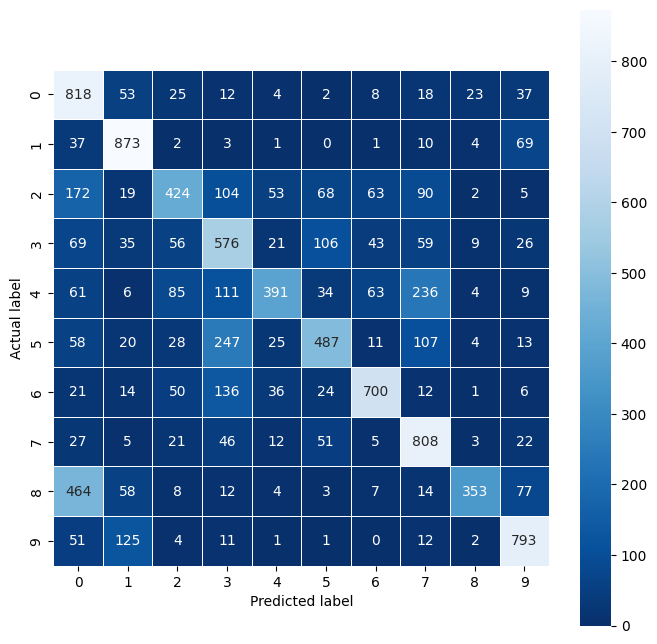

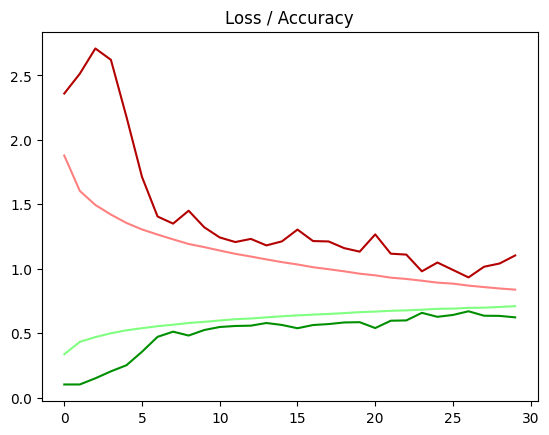

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.46      0.82      0.59      1000
           1       0.72      0.87      0.79      1000
           2       0.60      0.42      0.50      1000
           3       0.46      0.58      0.51      1000
           4       0.71      0.39      0.51      1000
           5       0.63      0.49      0.55      1000
           6       0.78      0.70      0.74      1000
           7       0.59      0.81      0.68      1000
           8       0.87      0.35      0.50      1000
           9       0.75      0.79      0.77      1000

    accuracy                           0.62     10000
   macro avg       0.66      0.62      0.61     10000
weighted avg       0.66      0.62      0.61     10000



In [31]:
show_confusion_matrix(model4, y_test, x_test, 'model_4')
show_compare_graph(history4, 'model_4')
show_classification_report(model4, y_test, x_test)

In [32]:
# Define the CNN model
model5 = Sequential([
    Input(shape=(32, 32, 3)), # Set input shape (32, 32, 3)
    Conv2D(64, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 64 filters
    BatchNormalization(), # Add a max pooling layer
    Conv2D(64, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 64 filters
    BatchNormalization(), # Add a max pooling layer
    MaxPooling2D((2, 2)), # Add a max pooling layer
    Conv2D(128, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 128 filters
    BatchNormalization(), # Add a max pooling layer
    Conv2D(128, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 128 filters
    BatchNormalization(), # Add a max pooling layer
    MaxPooling2D((2, 2)), # Add a max pooling layer
    Dropout(0.25), # Set a Dropout of 0.25
    GlobalAveragePooling2D(), # Add a global average pooling layer
    Flatten(), # Flatten the feature maps
    Dense(100, activation='relu'), # Add a dense layer with 100 units
    Dense(10, activation='softmax') # Add the output classification layer with softmax activation for 10 classes
])

# Print model summary
model5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 275,606 (1.05 MB)

 Trainable params: 274,838 (1.05 MB)

 Non-trainable params: 768 (3.00 KB)

In [33]:
# Compile model
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Time the model training
start_time = time.time()

# Train the model
history5 = model5.fit(x_train, y_train, epochs=30, batch_size=512, validation_data=(x_test, y_test))

end_time = time.time()

# Calculate the time taken
training_time = end_time - start_time

print(f"Model training time: {training_time} seconds")

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 120ms/step - accuracy: 0.3837 - loss: 1.6957 - val_accuracy: 0.0986 - val_loss: 2.8931
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.6062 - loss: 1.1082 - val_accuracy: 0.1000 - val_loss: 3.0912
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.6815 - loss: 0.8934 - val_accuracy: 0.1398 - val_loss: 3.9998
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.7325 - loss: 0.7551 - val_accuracy: 0.1172 - val_loss: 3.1226
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.7722 - loss: 0.6562 - val_accuracy: 0.1801 - val_loss: 2.6616
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.8011 - loss: 0.5696 - val_accuracy: 0.5915 - val_loss: 1.1675
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.8310 - loss: 0.4983 - val_accuracy: 0.7282 - val_loss: 0.7985
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.8494 - loss: 0.4343 - val_accuracy: 0.7551 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


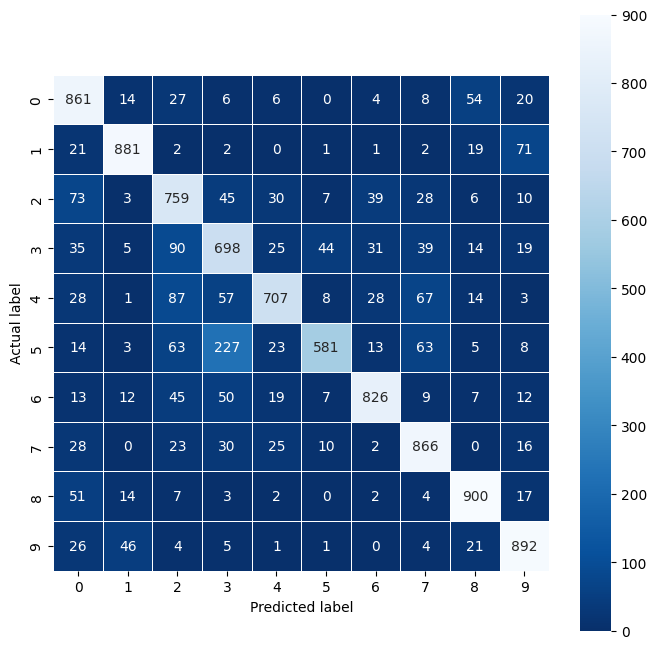

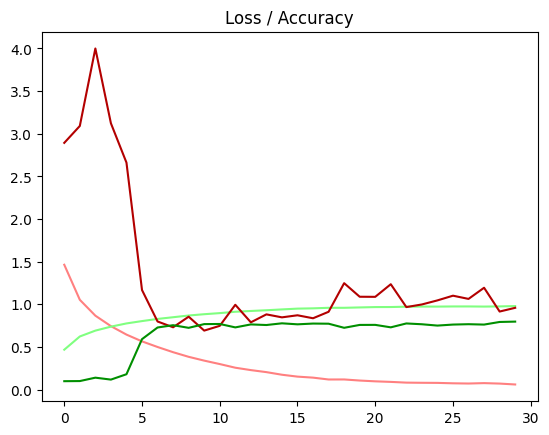

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.75      0.86      0.80      1000
           1       0.90      0.88      0.89      1000
           2       0.69      0.76      0.72      1000
           3       0.62      0.70      0.66      1000
           4       0.84      0.71      0.77      1000
           5       0.88      0.58      0.70      1000
           6       0.87      0.83      0.85      1000
           7       0.79      0.87      0.83      1000
           8       0.87      0.90      0.88      1000
           9       0.84      0.89      0.86      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



In [34]:
show_confusion_matrix(model5, y_test, x_test, 'model_5')
show_compare_graph(history5, 'model_5')
show_classification_report(model5, y_test, x_test)

In [35]:
# Define the CNN model
model6 = Sequential([
    Input(shape=(32, 32, 3)), # Set input shape (32, 32, 3)
    Conv2D(64, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 64 filters
    BatchNormalization(), # Add a max pooling layer
    Conv2D(64, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 64 filters
    BatchNormalization(), # Add a max pooling layer
    MaxPooling2D((2, 2)), # Add a max pooling layer
    Conv2D(128, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 128 filters
    BatchNormalization(), # Add a max pooling layer
    Conv2D(128, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 128 filters
    BatchNormalization(), # Add a max pooling layer
    MaxPooling2D((2, 2)), # Add a max pooling layer
    Dropout(0.25), # Set a Dropout of 0.25
    GlobalAveragePooling2D(), # Add a global average pooling layer
    Flatten(), # Flatten the feature maps
    Dense(100, activation='relu'), # Add a dense layer with 100 units
    Dense(10, activation='softmax') # Add the output classification layer with softmax activation for 10 classes
])

# Print model summary
model6.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 275,606 (1.05 MB)

 Trainable params: 274,838 (1.05 MB)

 Non-trainable params: 768 (3.00 KB)

In [36]:
# Set up Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile model
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Time the model training
start_time = time.time()

# Train the model
history6 = model6.fit(x_train, y_train, epochs=30, batch_size=512, validation_data=(x_test, y_test), callbacks=[early_stopping])

end_time = time.time()

# Calculate the time taken
training_time = end_time - start_time

print(f"Model training time: {training_time} seconds")

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - accuracy: 0.4034 - loss: 1.6521 - val_accuracy: 0.1000 - val_loss: 2.7006
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.6085 - loss: 1.0945 - val_accuracy: 0.1000 - val_loss: 4.1461
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.6820 - loss: 0.8972 - val_accuracy: 0.1000 - val_loss: 4.0307
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.7303 - loss: 0.7673 - val_accuracy: 0.1051 - val_loss: 4.1873
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.7683 - loss: 0.6637 - val_accuracy: 0.2069 - val_loss: 2.4513
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.7949 - loss: 0.5848 - val_accuracy: 0.5036 - val_loss: 1.4187
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.8234 - loss: 0.5118 - val_accuracy: 0.6584 - val_loss: 0.9925
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.8430 - loss: 0.4550 - val_accuracy: 0.7136 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


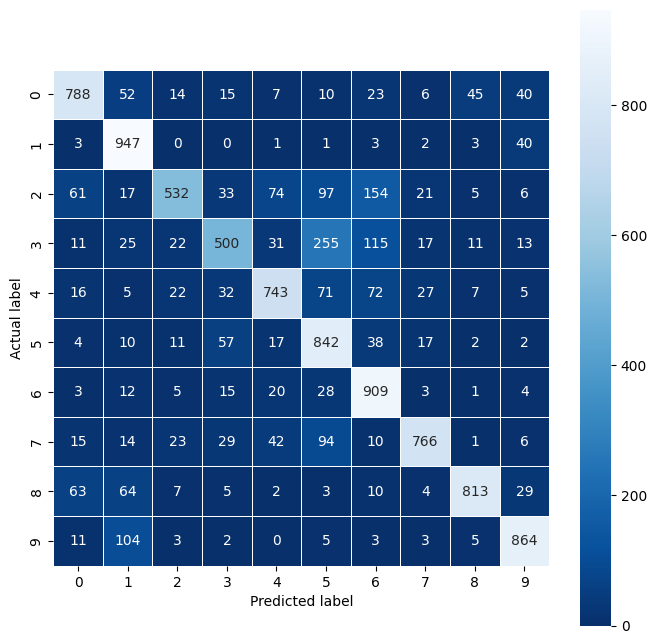

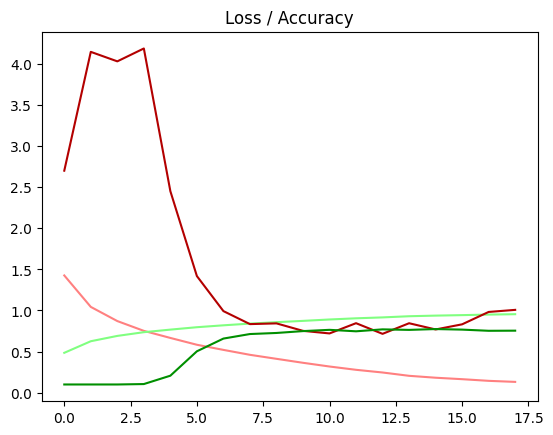

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1000
           1       0.76      0.95      0.84      1000
           2       0.83      0.53      0.65      1000
           3       0.73      0.50      0.59      1000
           4       0.79      0.74      0.77      1000
           5       0.60      0.84      0.70      1000
           6       0.68      0.91      0.78      1000
           7       0.88      0.77      0.82      1000
           8       0.91      0.81      0.86      1000
           9       0.86      0.86      0.86      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



In [37]:
show_confusion_matrix(model6, y_test, x_test, 'model_6')
show_compare_graph(history6, 'model_6')
show_classification_report(model6, y_test, x_test)

In [39]:
# Define the CNN model
model7 = Sequential([
    Input(shape=(32, 32, 3)), # Set input shape (32, 32, 3)
    Conv2D(64, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 64 filters
    BatchNormalization(), # Add a max pooling layer
    Conv2D(64, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 64 filters
    BatchNormalization(), # Add a max pooling layer
    MaxPooling2D((2, 2)),
    Dropout(0.25), # Set a Dropout of 0.25

    Conv2D(128, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 128 filters
    BatchNormalization(), # Add a max pooling layer
    Conv2D(128, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 128 filters
    BatchNormalization(), # Add a max pooling layer
    MaxPooling2D((2, 2)),
    Dropout(0.25), # Set a Dropout of 0.25

    Conv2D(256, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 128 filters
    BatchNormalization(), # Add a max pooling layer
    Conv2D(256, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 128 filters
    BatchNormalization(), # Add a max pooling layer
    MaxPooling2D((2, 2)),
    Dropout(0.25), # Set a Dropout of 0.25

    GlobalAveragePooling2D(), # Add a global average pooling layer
    Flatten(), # Flatten the feature maps
    Dense(100, activation='relu'), # Add a dense layer with 100 units
    Dense(10, activation='softmax') # Add the output classification layer with softmax activation for 10 classes
])

# Print model summary
model7.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,175,702 (4.48 MB)

 Trainable params: 1,173,910 (4.48 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [40]:
# Set up Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile model
model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Time the model training
start_time = time.time()

# Train the model
history7 = model7.fit(x_train, y_train, epochs=30, batch_size=512, validation_data=(x_test, y_test), callbacks=[early_stopping])

end_time = time.time()

# Calculate the time taken
training_time = end_time - start_time

print(f"Model training time: {training_time} seconds")

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 226ms/step - accuracy: 0.3921 - loss: 1.7202 - val_accuracy: 0.1022 - val_loss: 2.9785
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.6590 - loss: 0.9642 - val_accuracy: 0.1005 - val_loss: 4.1091
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.7313 - loss: 0.7636 - val_accuracy: 0.1001 - val_loss: 4.4700
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.7779 - loss: 0.6249 - val_accuracy: 0.1019 - val_loss: 4.5006
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.8199 - loss: 0.5142 - val_accuracy: 0.4043 - val_loss: 2.1340
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - accuracy: 0.8484 - loss: 0.4332 - val_accuracy: 0.6236 - val_loss: 1.1664
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - accuracy: 0.8730 - loss: 0.3698 - val_accuracy: 0.7970 - val_loss: 0.5971
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.8835 - loss: 0.3318 - val_accu

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


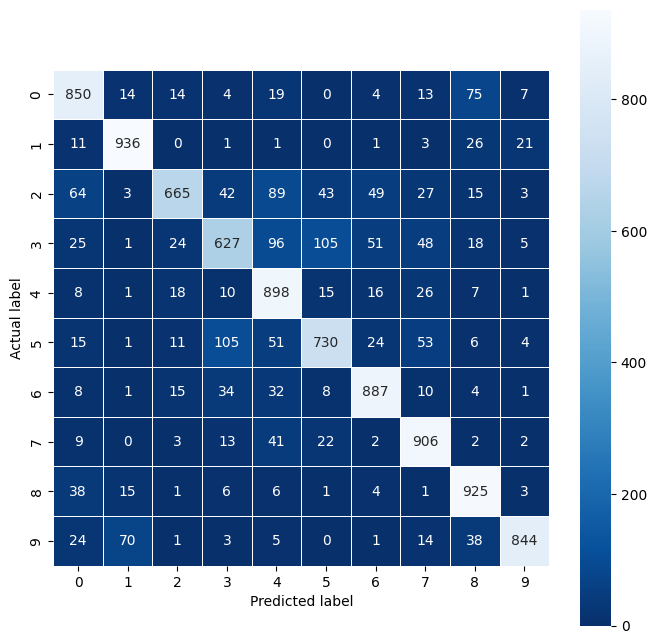

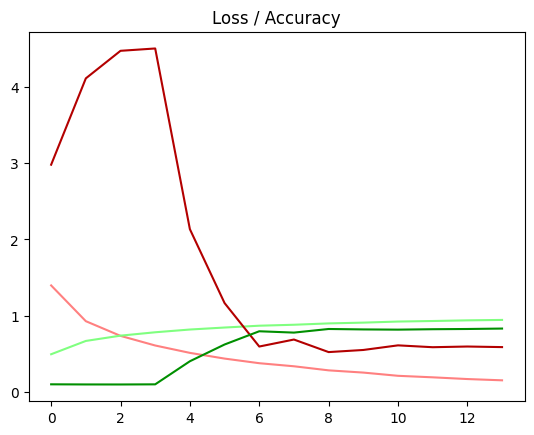

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.90      0.94      0.92      1000
           2       0.88      0.67      0.76      1000
           3       0.74      0.63      0.68      1000
           4       0.73      0.90      0.80      1000
           5       0.79      0.73      0.76      1000
           6       0.85      0.89      0.87      1000
           7       0.82      0.91      0.86      1000
           8       0.83      0.93      0.87      1000
           9       0.95      0.84      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.82     10000
weighted avg       0.83      0.83      0.82     10000



In [41]:
show_confusion_matrix(model7, y_test, x_test, 'model_7')
show_compare_graph(history7, 'model_7')
show_classification_report(model7, y_test, x_test)

In [42]:
# Define the CNN model
model8 = Sequential([
    Input(shape=(32, 32, 3)), # Set input shape (32, 32, 3)
    Conv2D(64, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 64 filters
    BatchNormalization(), # Add a max pooling layer
    Conv2D(64, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 64 filters
    BatchNormalization(), # Add a max pooling layer
    MaxPooling2D((2, 2)),
    Dropout(0.25), # Set a Dropout of 0.25

    Conv2D(128, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 128 filters
    BatchNormalization(), # Add a max pooling layer
    Conv2D(128, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 128 filters
    BatchNormalization(), # Add a max pooling layer
    MaxPooling2D((2, 2)),
    Dropout(0.25), # Set a Dropout of 0.25

    Conv2D(256, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 128 filters
    BatchNormalization(), # Add a max pooling layer
    Conv2D(256, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 128 filters
    BatchNormalization(), # Add a max pooling layer
    MaxPooling2D((2, 2)),
    Dropout(0.25), # Set a Dropout of 0.25

    GlobalAveragePooling2D(), # Add a global average pooling layer
    Flatten(), # Flatten the feature maps
    Dense(100, activation='relu'), # Add a dense layer with 100 units
    Dense(10, activation='softmax') # Add the output classification layer with softmax activation for 10 classes
])

# Print model summary
model8.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,175,702 (4.48 MB)

 Trainable params: 1,173,910 (4.48 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [47]:
# Set up Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile model
model8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Time the model training
start_time = time.time()

# Train the model
history8 = model8.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stopping])

end_time = time.time()

# Calculate the time taken
training_time = end_time - start_time

print(f"Model training time: {training_time} seconds")

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 49ms/step - accuracy: 0.9072 - loss: 0.2600 - val_accuracy: 0.8035 - val_loss: 0.6922
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9201 - loss: 0.2197 - val_accuracy: 0.8062 - val_loss: 0.6784
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9314 - loss: 0.1908 - val_accuracy: 0.8065 - val_loss: 0.6572
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9387 - loss: 0.1746 - val_accuracy: 0.8105 - val_loss: 0.6620
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9404 - loss: 0.1684 - val_accuracy: 0.8033 - val_loss: 0.6923
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9491 - loss: 0.1443 - val_accuracy: 0.8232 - val_loss: 0.6838
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9514 - loss: 0.1339 - val_accuracy: 0.8024 - val_loss: 0.7680
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9524 - loss: 0.1328 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


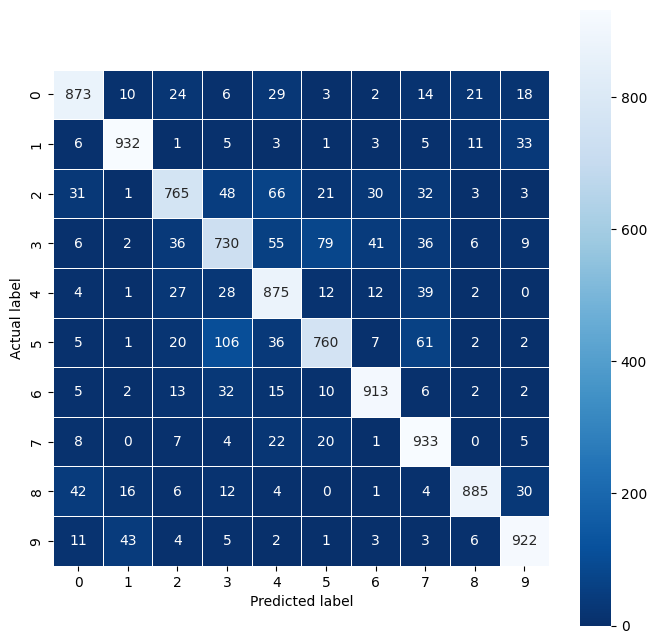

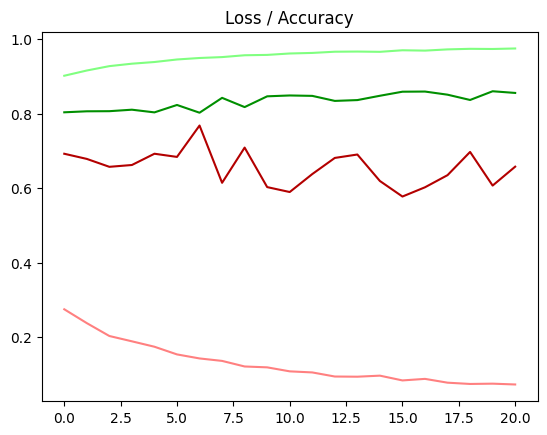

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1000
           1       0.92      0.93      0.93      1000
           2       0.85      0.77      0.80      1000
           3       0.75      0.73      0.74      1000
           4       0.79      0.88      0.83      1000
           5       0.84      0.76      0.80      1000
           6       0.90      0.91      0.91      1000
           7       0.82      0.93      0.87      1000
           8       0.94      0.89      0.91      1000
           9       0.90      0.92      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [48]:
show_confusion_matrix(model8, y_test, x_test, 'model_8')
show_compare_graph(history8, 'model_8')
show_classification_report(model8, y_test, x_test)

In [49]:
# Define the CNN model
model9 = Sequential([
    Input(shape=(32, 32, 3)), # Set input shape (32, 32, 3)
    Conv2D(64, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 64 filters
    BatchNormalization(), # Add a max pooling layer
    Conv2D(64, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 64 filters
    BatchNormalization(), # Add a max pooling layer
    MaxPooling2D((2, 2)),
    Dropout(0.25), # Set a Dropout of 0.25

    Conv2D(128, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 128 filters
    BatchNormalization(), # Add a max pooling layer
    Conv2D(128, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 128 filters
    BatchNormalization(), # Add a max pooling layer
    MaxPooling2D((2, 2)),
    Dropout(0.25), # Set a Dropout of 0.25

    Conv2D(256, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 128 filters
    BatchNormalization(), # Add a max pooling layer
    Conv2D(256, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 128 filters
    BatchNormalization(), # Add a max pooling layer
    MaxPooling2D((2, 2)),
    Dropout(0.25), # Set a Dropout of 0.25

    GlobalAveragePooling2D(), # Add a global average pooling layer
    Flatten(), # Flatten the feature maps
    Dense(100, activation='relu'), # Add a dense layer with 100 units
    Dense(10, activation='softmax') # Add the output classification layer with softmax activation for 10 classes
])

# Print model summary
model9.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_38               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,175,702 (4.48 MB)

 Trainable params: 1,173,910 (4.48 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [53]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
train_generator = datagen.flow(x_train, y_train, batch_size=128)

# Set up Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile model
model9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Time the model training
start_time = time.time()

# Train the model
history9 = model9.fit(train_generator, epochs=30, validation_data=(x_test, y_test), callbacks=[early_stopping])

end_time = time.time()

# Calculate the time taken
training_time = end_time - start_time

print(f"Model training time: {training_time} seconds")

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 47s 97ms/step - accuracy: 0.6362 - loss: 1.0238 - val_accuracy: 0.6923 - val_loss: 0.8951
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.7299 - loss: 0.7758 - val_accuracy: 0.6408 - val_loss: 1.1462
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.7662 - loss: 0.6718 - val_accuracy: 0.7277 - val_loss: 0.8348
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step - accuracy: 0.7949 - loss: 0.5967 - val_accuracy: 0.7699 - val_loss: 0.6953
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step - accuracy: 0.8115 - loss: 0.5454 - val_accuracy: 0.7655 - val_loss: 0.7212
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.8277 - loss: 0.4989 - val_accuracy: 0.8052 - val_loss: 0.6115
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.8334 - loss: 0.4755 - val_accuracy: 0.7925 - val_loss: 0.6401
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.8431 - loss: 0.4496 - val_accurac

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


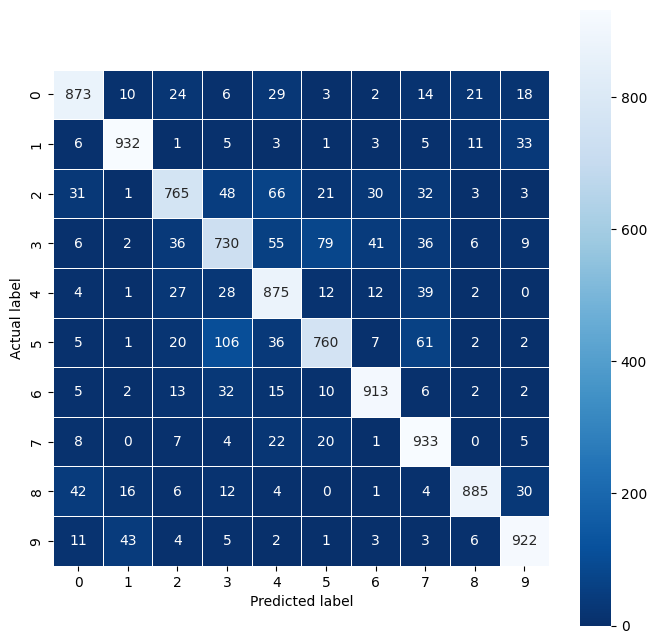

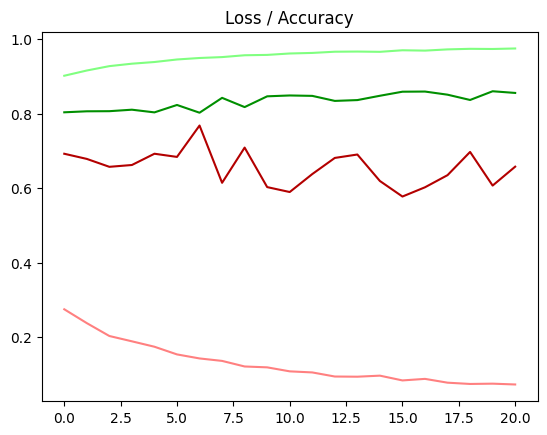

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1000
           1       0.92      0.93      0.93      1000
           2       0.85      0.77      0.80      1000
           3       0.75      0.73      0.74      1000
           4       0.79      0.88      0.83      1000
           5       0.84      0.76      0.80      1000
           6       0.90      0.91      0.91      1000
           7       0.82      0.93      0.87      1000
           8       0.94      0.89      0.91      1000
           9       0.90      0.92      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [54]:
show_confusion_matrix(model9, y_test, x_test, 'model_8')
show_compare_graph(history9, 'model_8')
show_classification_report(model9, y_test, x_test)

In [55]:
# Define the CNN model
model10 = Sequential([
    Input(shape=(32, 32, 3)), # Set input shape (32, 32, 3)
    Conv2D(64, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 64 filters
    BatchNormalization(), # Add a max pooling layer
    Conv2D(64, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 64 filters
    BatchNormalization(), # Add a max pooling layer
    MaxPooling2D((2, 2)),
    Dropout(0.25), # Set a Dropout of 0.25

    Conv2D(128, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 128 filters
    BatchNormalization(), # Add a max pooling layer
    Conv2D(128, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 128 filters
    BatchNormalization(), # Add a max pooling layer
    MaxPooling2D((2, 2)),
    Dropout(0.25), # Set a Dropout of 0.25

    Conv2D(256, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 128 filters
    BatchNormalization(), # Add a max pooling layer
    Conv2D(256, (3, 3), activation='relu', padding='same'), # Add a convolutional layer with a 3x3 filter, 128 filters
    BatchNormalization(), # Add a max pooling layer
    MaxPooling2D((2, 2)),
    Dropout(0.25), # Set a Dropout of 0.25

    GlobalAveragePooling2D(), # Add a global average pooling layer
    Flatten(), # Flatten the feature maps
    Dense(100, activation='relu'), # Add a dense layer with 100 units
    Dense(10, activation='softmax') # Add the output classification layer with softmax activation for 10 classes
])

# Print model summary
model10.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_40               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_41               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_44               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_45               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,175,702 (4.48 MB)

 Trainable params: 1,173,910 (4.48 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [59]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
train_generator = datagen.flow(x_train, y_train, batch_size=128)

# Set up Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# change learning rate
optimizer = Adam(learning_rate=0.001)

# Compile model
model10.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Time the model training
start_time = time.time()

# Train the model
history10 = model10.fit(train_generator, epochs=30, validation_data=(x_test, y_test), callbacks=[early_stopping])

end_time = time.time()

# Calculate the time taken
training_time = end_time - start_time

print(f"Model training time: {training_time} seconds")

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 47s 97ms/step - accuracy: 0.5049 - loss: 1.4237 - val_accuracy: 0.6029 - val_loss: 1.1683
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step - accuracy: 0.6818 - loss: 0.9022 - val_accuracy: 0.6882 - val_loss: 0.9161
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 84ms/step - accuracy: 0.7440 - loss: 0.7400 - val_accuracy: 0.7073 - val_loss: 0.9038
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step - accuracy: 0.7695 - loss: 0.6585 - val_accuracy: 0.7565 - val_loss: 0.7118
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 84ms/step - accuracy: 0.7951 - loss: 0.5906 - val_accuracy: 0.7272 - val_loss: 0.8470
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.8127 - loss: 0.5362 - val_accuracy: 0.7467 - val_loss: 0.7399
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step - accuracy: 0.8259 - loss: 0.4987 - val_accuracy: 0.8260 - val_loss: 0.5296
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step - accuracy: 0.8425 - loss: 0.4608 - val_accurac

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


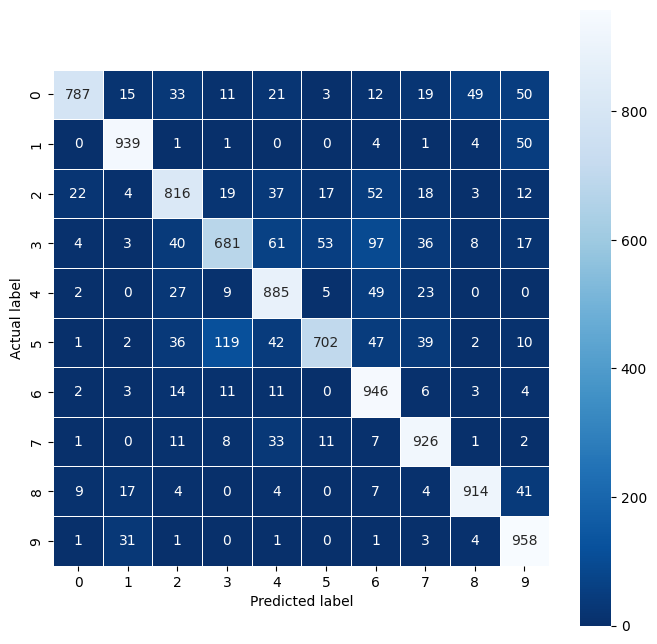

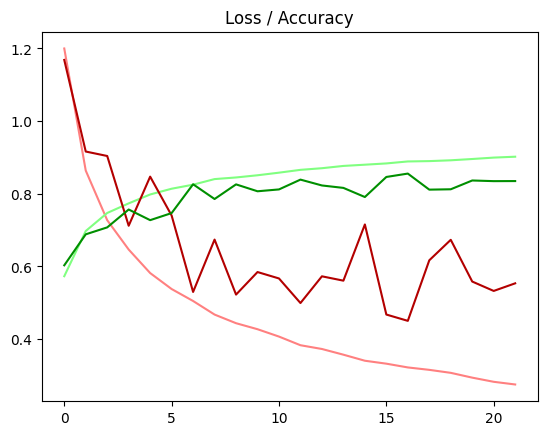

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      1000
           1       0.93      0.94      0.93      1000
           2       0.83      0.82      0.82      1000
           3       0.79      0.68      0.73      1000
           4       0.81      0.89      0.84      1000
           5       0.89      0.70      0.78      1000
           6       0.77      0.95      0.85      1000
           7       0.86      0.93      0.89      1000
           8       0.93      0.91      0.92      1000
           9       0.84      0.96      0.89      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



In [66]:
show_confusion_matrix(model10, y_test, x_test, 'model_10')
show_compare_graph(history10, 'model_10')
show_classification_report(model10, y_test, x_test)